# Predicting house prices using the Boston Housing Dataset

In [1]:
#Import Libraries
import pandas as pd
import numpy as np

# Data Import

In [2]:
#Insert column names as dataset doesn't have that
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#Load Dataset
df = pd.read_csv('housing.csv', delimiter = '\s+', names = cols)

In [3]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [4]:
df.shape

(506, 14)

In [5]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

# Preprocessing

In [4]:
#Checking for missing values
df.isnull().values.any()

False

In [5]:
#Finding and removing outliers using z-score
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis = 1)]

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[415 rows x 14 columns]

In [6]:
#Separating independent and dependent columns
X = df.iloc[:, 0:13].values
y = df.iloc[:, -1].values

In [7]:
#Normalizing each column
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [ ]:
#Correlation of Features

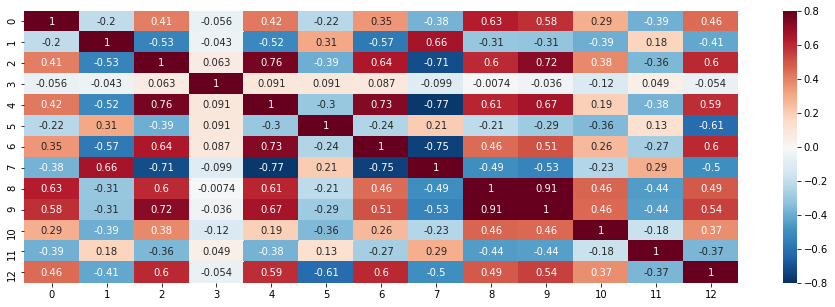

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
correlation_opt = pd.DataFrame(data = X_scaled, index = None, columns = None).corr()
plt.figure(figsize=(16, 5))
heatmap = sns.heatmap(correlation_opt, annot=True, linewidths=0, vmin=-0.80, vmax=0.80, cmap="RdBu_r")

In [9]:
#Removing Correlated features
correlated_features = set()
correlation_matrix = pd.DataFrame(data = X_scaled , index = None, columns = None).corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [10]:
trimmed_X = pd.DataFrame(data = X_scaled, index = None, columns = None).drop(correlated_features, axis = 1)
trimmed_X = trimmed_X.values


In [11]:
print('Removed Columns: {0}'.format(correlated_features))

Removed Columns: {9}


# Feature Selection

We will use 2 approaches: 
1) Select the 5 best features using Pearson's Coeffeicent
2) Keep all the features

In [13]:
#Pearson's

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func = f_regression, k = 5)
fit = fs.fit(trimmed_X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(pd.DataFrame(data = trimmed_X, index = None, columns = None).columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
#Selecting the 5 best features
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(5,'Score')) 

    Feature       Score
11       11  601.617871
5         5  471.846740
9         9  175.105543
2         2  153.954883
4         4  112.591480


In [14]:
best_features = []
best_features = featureScores.nlargest(5, 'Score')['Feature'].tolist()

In [15]:
X_bestfeatures = trimmed_X[:, best_features]

We have 2 data sets of features now:
X_bestfeatures (5 features) & X_trimmed (all features except feature 9)

# Model Selection

We will try:
1)Linear Regression
2)Support Vector Regression 
3)Random Forest Regression
4)Gradient Boost

Validation Results will be obtained using K-Fold Cross Validation with R2 as the performance metric

Linear Regression

In [110]:
#Store score of each result
modelScores = []
models = ['LinRegAll', 'LinRegBest', 'SVRAll', 'SVRBest', 'RFAll', 'RFBest', 'XGBoostAll', 'XGBoostBest']

In [111]:
#On all features
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
scores_lin_reg_all = cross_val_score(lin_reg, trimmed_X, y, scoring = 'r2', cv = 10) 
modelScores.append(np.mean(scores_lin_reg_all))

In [112]:
#On best 5 features
lin_reg = linear_model.LinearRegression()
scores_lin_reg_best = cross_val_score(lin_reg, X_bestfeatures, y, scoring = 'r2', cv = 10) 
modelScores.append(np.mean(scores_lin_reg_best))


SVR

In [113]:
#On all features
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
scores_svr_all = cross_val_score(svr, trimmed_X, y, scoring = 'r2', cv = 10)
modelScores.append(np.mean(scores_svr_all))

In [114]:
#On best 5 features
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
scores_svr_best = cross_val_score(svr, X_bestfeatures, y, scoring = 'r2', cv = 10)
modelScores.append(np.mean(scores_svr_best))

Random Forest

In [115]:
#On all features
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 25, random_state = 0)
scores_rf_all = cross_val_score(rf, trimmed_X, y, scoring = 'r2', cv = 10)
modelScores.append(np.mean(scores_rf_all))


In [116]:
#On best 5 features
rf = RandomForestRegressor(n_estimators = 25, random_state = 0)
scores_rf_all = cross_val_score(rf, X_bestfeatures, y, scoring = 'r2', cv = 10)
modelScores.append(np.mean(scores_rf_all))

XGBoost

In [117]:
#On all features
from sklearn.ensemble import GradientBoostingRegressor
xg = GradientBoostingRegressor()
scores_xg_all = cross_val_score(xg, trimmed_X, y, scoring = 'r2', cv = 10)
modelScores.append(np.mean(scores_xg_all))

In [118]:
#On best 5 features
from sklearn.ensemble import GradientBoostingRegressor
xg = GradientBoostingRegressor()
scores_xg_best = cross_val_score(xg, X_bestfeatures, y, scoring = 'r2', cv = 10)
modelScores.append(np.mean(scores_xg_best))

# Plotting the Results

<BarContainer object of 8 artists>

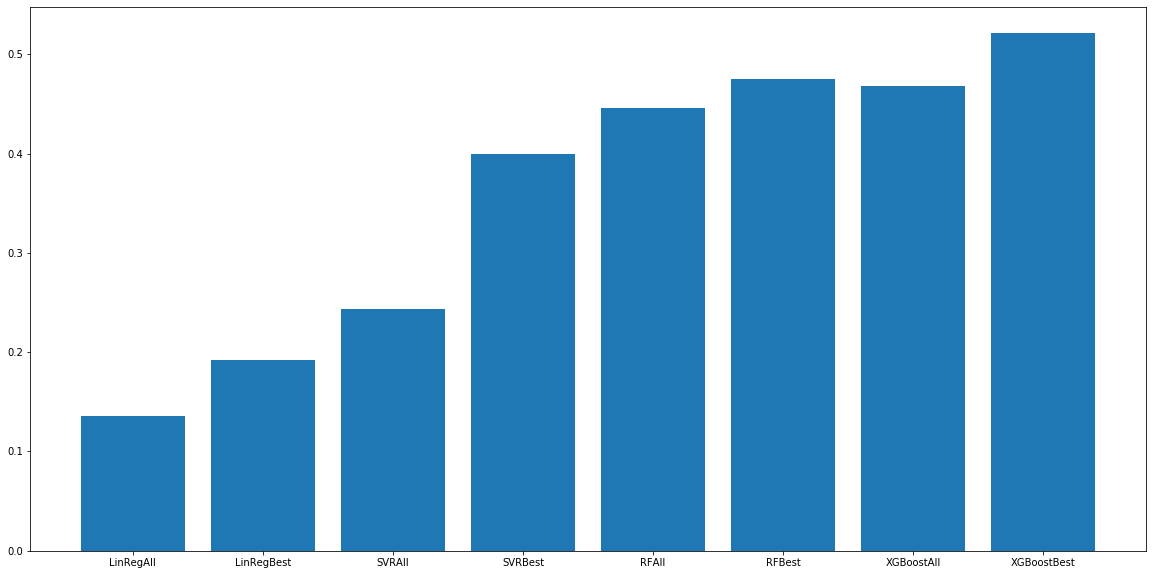

In [125]:
plt.subplots(figsize=(20,10))
plt.bar(x = models, height = modelScores)

# Finding Best Parameters for the best model with Grid Search

In [128]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[100, 200, 300], 'learning_rate': [0.05,0.075,0.1], 'max_depth':[2,4,6], 'min_samples_leaf':[3,5,9]}
xg = GradientBoostingRegressor()
grid_xg = GridSearchCV(xg, cv = 10, param_grid = param_grid, scoring = 'r2')
grid_xg.fit(X_bestfeatures, y)
print("Best Regressor:", grid_xg.best_estimator_)

Best Regressor: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [129]:
scores_gridxg_best = np.mean(cross_val_score(grid_xg.best_estimator_, X_bestfeatures, y, scoring = 'r2', cv = 10))

In [130]:
scores_gridxg_best

0.567207298591576